In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, PowerTransformer
from sklearn.svm import SVR  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error
from sklearn.decomposition import PCA 

import plotly.express as px

In [3]:
df = pd.read_csv('SVM_df.csv')

Ensuring the file was read in correctly

In [4]:
df.head()

,Year,Access_to_electricity_(%_of_population),"Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)",Adjusted_net_national_income_(constant_2015_US$),Adjusted_net_national_income_per_capita_(annual_%_growth),Adjusted_net_national_income_per_capita_(constant_2015_US$),"Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_bottom_40%_of_population_(%)","Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_total_population_(%)",CPIA_social_protection_rating_(1=low_to_6=high),CPIA_trade_rating_(1=low_to_6=high),...,Country_Name_Sub-Saharan Africa,Country_Name_Sub-Saharan Africa (IDA & IBRD countries),Country_Name_Sub-Saharan Africa (excluding high income),Country_Name_Sudan,Country_Name_Tanzania,Country_Name_Togo,Country_Name_Uganda,Country_Name_World,Country_Name_Zambia,Country_Name_Zimbabwe
0,1999,2.359690e+11,2.359690e+11,2.359690e+11,2.359690e+11,2.359690e+11,2.359690e+11,2.359690e+11,2.359690e+11,2.359690e+11,...,0,0,0,0,0,0,0,0,0,0
1,2000,1.995793e+01,2.270450e+11,2.270450e+11,2.270450e+11,2.270450e+11,2.270450e+11,2.270450e+11,2.270450e+11,2.270450e+11,...,0,0,0,0,0,0,0,0,0,0
2,2001,1.998622e+01,2.460002e+11,2.460002e+11,2.460002e+11,2.460002e+11,2.460002e+11,2.460002e+11,2.460002e+11,2.460002e+11,...,0,0,0,0,0,0,0,0,0,0
3,2002,2.160150e+01,2.489774e+11,3.991570e+11,2.489774e+11,9.442113e+02,2.489774e+11,2.489774e+11,2.489774e+11,2.489774e+11,...,0,0,0,0,0,0,0,0,0,0
4,2003,2.254831e+01,2.652209e+11,4.191230e+11,2.323504e+00,9.661501e+02,2.652209e+11,2.652209e+11,2.652209e+11,2.652209e+11,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.tail()

,Year,Access_to_electricity_(%_of_population),"Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)",Adjusted_net_national_income_(constant_2015_US$),Adjusted_net_national_income_per_capita_(annual_%_growth),Adjusted_net_national_income_per_capita_(constant_2015_US$),"Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_bottom_40%_of_population_(%)","Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_total_population_(%)",CPIA_social_protection_rating_(1=low_to_6=high),CPIA_trade_rating_(1=low_to_6=high),...,Country_Name_Sub-Saharan Africa,Country_Name_Sub-Saharan Africa (IDA & IBRD countries),Country_Name_Sub-Saharan Africa (excluding high income),Country_Name_Sudan,Country_Name_Tanzania,Country_Name_Togo,Country_Name_Uganda,Country_Name_World,Country_Name_Zambia,Country_Name_Zimbabwe
1161,2016,42.561729,5.490718e+11,1.716261e+10,-2.684791,1187.501803,5.490718e+11,5.490718e+11,2.5,2.5,...,0,0,0,0,0,0,0,0,0,1
1162,2017,44.178635,5.527886e+11,1.776074e+10,1.391659,1204.027783,-3.750000e+00,-3.500000e+00,2.5,2.5,...,0,0,0,0,0,0,0,0,0,1
1163,2018,45.572647,5.726864e+11,1.026982e+10,-43.333468,682.280794,5.726864e+11,5.726864e+11,3.0,2.5,...,0,0,0,0,0,0,0,0,0,1
1164,2019,46.781475,6.642367e+11,1.594563e+10,52.208815,1038.491511,6.642367e+11,6.642367e+11,3.0,3.0,...,0,0,0,0,0,0,0,0,0,1
1165,2020,52.747669,7.302537e+11,1.337349e+10,-17.816970,853.463791,7.302537e+11,7.302537e+11,3.0,3.0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
skewness = df.skew()
print(skewness)

Year                                                                        0.000000
Access_to_electricity_(%_of_population)                                     5.875755
Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)    0.512303
Adjusted_net_national_income_(constant_2015_US$)                            7.130517
Adjusted_net_national_income_per_capita_(annual_%_growth)                   1.862871
                                                                              ...   
Country_Name_Togo                                                           7.081541
Country_Name_Uganda                                                         7.081541
Country_Name_World                                                          7.081541
Country_Name_Zambia                                                         7.081541
Country_Name_Zimbabwe                                                       7.081541
Length: 158, dtype: float64


In [7]:
skewness = df.skew()
skewness.to_csv('skewness_values.csv', header=True)

In [8]:
skewness = df.skew()
pd.set_option('display.max_rows', None) 
display(pd.DataFrame(skewness, columns=['Skewness']))
pd.reset_option('display.max_rows')  

    # Above we are altering pandas settings to display all rows, and resetting it afterwards

,Skewness
Year,0.000000
Access_to_electricity_(%_of_population),5.875755
"Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)",0.512303
Adjusted_net_national_income_(constant_2015_US$),7.130517
Adjusted_net_national_income_per_capita_(annual_%_growth),1.862871
Adjusted_net_national_income_per_capita_(constant_2015_US$),1.908074
"Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_bottom_40%_of_population_(%)",0.260074
"Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_total_population_(%)",0.260074
CPIA_social_protection_rating_(1=low_to_6=high),1.068612
CPIA_trade_rating_(1=low_to_6=high),1.072646


##### I have decided to drop the Country_Name columns. My reasoning for this is due to prevent overfitting and to help identify the indicators that lead to development that apply across all of Sub-Saharan Africa.

##### Initially, I was going to run through my model once with the country data and once without the country data. However, I opted to drop these columns for the above reasons.

## Removing Redundant Features

Despite doing a great job last semester in reducing the world development index to the relevant size and scope needed, I noticed there were still several redundant features in the dataset. These are features that captured similar data and often times had similar or identical skewness values. I remove these below, while retaining all the other columns that I still see relevant for the purposes of our project.

In [9]:
print(df.columns.tolist())

['Year', 'Access_to_electricity_(%_of_population)', 'Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)', 'Adjusted_net_national_income_(constant_2015_US$)', 'Adjusted_net_national_income_per_capita_(annual_%_growth)', 'Adjusted_net_national_income_per_capita_(constant_2015_US$)', 'Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_bottom_40%_of_population_(%)', 'Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_total_population_(%)', 'CPIA_social_protection_rating_(1=low_to_6=high)', 'CPIA_trade_rating_(1=low_to_6=high)', 'Central_government_debt,_total_(%_of_GDP)', 'Children_out_of_school,_primary', 'Current_account_balance_(%_of_GDP)', 'Current_health_expenditure_(%_of_GDP)', 'Current_health_expenditure_per_capita,_PPP_(current_international_$)', 'Employment_to_population_ratio,_15+,_total_(%)_(modeled_ILO_estimate)', 'Exports_of_goods_and_services_(%_of_GDP)', 'Exports_of_goods_and_services_(

In [10]:
columns_to_drop = [
    'Adjusted_net_national_income_per_capita_(constant_2015_US$)',
    'Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_total_population_(%)',
    'Current_health_expenditure_(%_of_GDP)',
    'Government_expenditure_on_education,_total_(%_of_GDP)',
    'Human_capital_index_(HCI),_upper_bound_(scale_0-1)',
    'Income_share_held_by_lowest_20%',
    'Income_share_held_by_highest_20%',
    'Poverty_gap_at_$3.65_a_day_(2017_PPP)_(%)',
    'Poverty_gap_at_$6.85_a_day_(2017_PPP)_(%)',
    'Poverty_headcount_ratio_at_$6.85_a_day_(2017_PPP)_(%_of_population)',
    'Poverty_headcount_ratio_at_$2.15_a_day_(2017_PPP)_(%_of_population)',
    'Taxes_on_exports_(%_of_tax_revenue)',
    'Exports_of_goods_and_services_(%_of_GDP)',
    'Final_consumption_expenditure_(annual_%_growth)',
    'Taxes_on_international_trade_(current_LCU)',
    'Increase_in_poverty_gap_at_$3.20_($_2011_PPP)_poverty_line_due_to_out-of-pocket_health_care_expenditure_(%_of_poverty_line)',
    'Increase_in_poverty_gap_at_$3.20_($_2011_PPP)_poverty_line_due_to_out-of-pocket_health_care_expenditure_(USD)']

df = df.drop(columns_to_drop, axis=1)

In [11]:
df.shape

(1166, 141)

In [12]:
df.isnull().sum()
    # Just ensuring that there is no missing values.

Year                                                                        0
Access_to_electricity_(%_of_population)                                     0
Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)    0
Adjusted_net_national_income_(constant_2015_US$)                            0
Adjusted_net_national_income_per_capita_(annual_%_growth)                   0
                                                                           ..
Country_Name_Togo                                                           0
Country_Name_Uganda                                                         0
Country_Name_World                                                          0
Country_Name_Zambia                                                         0
Country_Name_Zimbabwe                                                       0
Length: 141, dtype: int64

##### As I am working with SVMs, I do not need to transform the dataset. SVMs doe not need normally distributed data as they are based on distances between data points. Scaling the data is however, very important.

##### For this reason I will duplicate the dataframe and run and analyse which scaler works best.

## Isolating Target Variable

target variable = GDP_per_capita_(constant_2015_US$)
 (same as last semester)

In [13]:
X = df.drop('GDP_per_capita_(constant_2015_US$)', axis=1)
y = df['GDP_per_capita_(constant_2015_US$)'].values

## Hoping Transforming data will improve score

In [14]:
pt = PowerTransformer(method='yeo-johnson')
X_yeojohnson_transformed = pt.fit_transform(X)

# Scaling

In [15]:
robust_scaler = RobustScaler()
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
normalizer = Normalizer()

X_robust_scaled = robust_scaler.fit_transform(X)
X_standard_scaled = standard_scaler.fit_transform(X)
X_minmax_scaled = minmax_scaler.fit_transform(X)
X_normalized = normalizer.fit_transform(X)

     # Creating multiple copies so I can easily test multiple scalers and find which one works best.

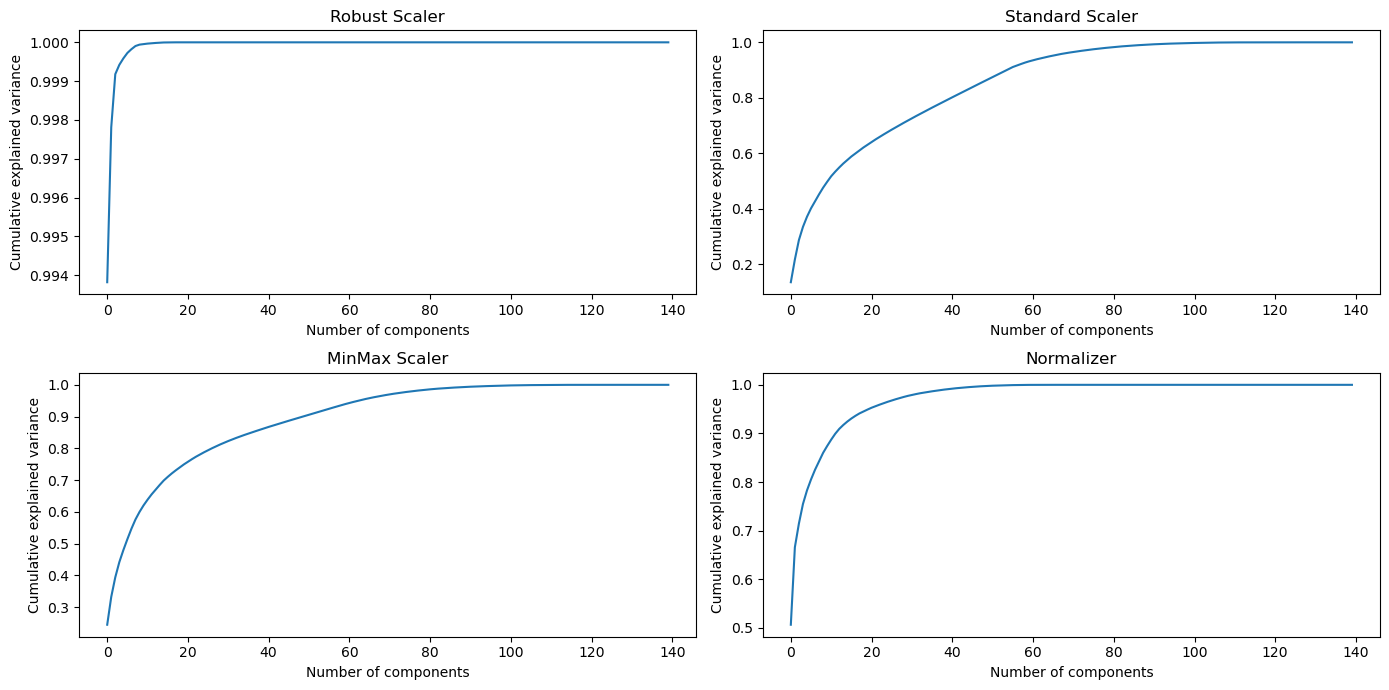

In [16]:
def plot_cumulative_variance(scaled_df, title):
    pca = PCA().fit(scaled_df)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of components')
    plt.ylabel('Cumulative explained variance')
    plt.title(title)
    # week 4: semester 1: data preparation: "Week 4 Wine In Class Example"

plt.figure(figsize = (14, 7))

plt.subplot(2, 2, 1)
plot_cumulative_variance(X_robust_scaled, 'Robust Scaler')

plt.subplot(2, 2, 2)
plot_cumulative_variance(X_standard_scaled, 'Standard Scaler')

plt.subplot(2, 2, 3)
plot_cumulative_variance(X_minmax_scaled, 'MinMax Scaler')

plt.subplot(2, 2, 4)
plot_cumulative_variance(X_normalized, 'Normalizer')

plt.tight_layout()
plt.show()

##### Chose robust scaler - performs best in PCA above and isn't as effected by outliers as MinMax (other consideration)
##### Changed to MinMax due to poor model performance

## Spliting & Applying chosen Scaler to Dataset

### 80/20 & 70/30

In [17]:
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.20, random_state=42)
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
X_train_80_scaled = minmax_scaler.fit_transform(X_train_80)
X_test_20_scaled = minmax_scaler.transform(X_test_20)

X_train_70_scaled = minmax_scaler.fit_transform(X_train_70)
X_test_30_scaled = minmax_scaler.transform(X_test_30)

### 80/20

In [19]:
Base_80_RBF = SVR(kernel='rbf')
Base_80_RBF.fit(X_train_80_scaled, y_train_80)

SVR()

In [20]:
hyperparameters_80 = {'C': [0.1, 1, 10, 100, 500], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]}
    # This is setting the gridsearch parameters

In [21]:
Hype_80 = GridSearchCV(SVR(kernel='rbf'), hyperparameters_80, refit=True, cv=5, verbose=3)
Hype_80.fit(X_train_80_scaled, y_train_80)
    # This step is creating the gridsearch & K-fold cross-validation that we'll apply to the 80/20 split
        # Applying the above to the training set

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ...................C=0.1, gamma=1;, score=-0.051 total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=1;, score=-0.054 total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=1;, score=-0.040 total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=1;, score=-0.047 total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=1;, score=-0.032 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.1;, score=-0.051 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.1;, score=-0.054 total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=0.1;, score=-0.040 total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=0.1;, score=-0.047 total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=0.1;, score=-0.032 total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=0.01;, score=-0.051 total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.01;

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 500],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05]},
             verbose=3)

In [22]:
best_hyperparameters_80 = Hype_80.best_params_

print("Best Parameters:", best_hyperparameters_80)

    # Finding out what are the best parameters from those tested

Best Parameters: {'C': 500, 'gamma': 0.1}


In [23]:
Final_80_RBF = Hype_80.best_estimator_

### 70/30

Repeating the exact same code as above for the 70/30 RBF split

In [24]:
Base_70_RBF = SVR(kernel='rbf')
Base_70_RBF.fit(X_train_70_scaled, y_train_70)

SVR()

In [25]:
hyperparameters_70 = {'C': [0.1, 1, 10, 100, 500], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]}

In [26]:
Hype_70 = GridSearchCV(SVR(kernel='rbf'), hyperparameters_70, refit=True, cv=5, verbose=3)

Hype_70.fit(X_train_70_scaled, y_train_70)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ...................C=0.1, gamma=1;, score=-0.067 total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=1;, score=-0.046 total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=1;, score=-0.035 total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=1;, score=-0.047 total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=1;, score=-0.031 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.1;, score=-0.067 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.1;, score=-0.046 total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=0.1;, score=-0.035 total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=0.1;, score=-0.047 total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=0.1;, score=-0.031 total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=0.01;, score=-0.067 total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.01;

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 500],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05]},
             verbose=3)

In [27]:
best_hyperparameters_70 = Hype_70.best_params_

print("Best Parameters:", best_hyperparameters_70)

Best Parameters: {'C': 500, 'gamma': 0.1}


In [28]:
Final_70_RBF = Hype_70.best_estimator_

# SVM with Polynomial Kernel

###  80/20

In [29]:
Base_80_POLY = SVR(kernel='poly')
Base_80_POLY.fit(X_train_80_scaled, y_train_80)

SVR(kernel='poly')

In [30]:
Hyperparameters_poly = {'C': [15], 'degree': [3], 'gamma': ['scale'], 'coef0': [0]}

In [31]:
Final_80_POLY = GridSearchCV(SVR(kernel = 'poly'), Hyperparameters_poly, cv = 3, verbose = 3)

In [32]:
Final_80_POLY.fit(X_train_80_scaled, y_train_80)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END C=15, coef0=0, degree=3, gamma=scale;, score=-0.051 total time=   0.0s
[CV 2/3] END C=15, coef0=0, degree=3, gamma=scale;, score=-0.048 total time=   0.0s
[CV 3/3] END C=15, coef0=0, degree=3, gamma=scale;, score=-0.035 total time=   0.0s


GridSearchCV(cv=3, estimator=SVR(kernel='poly'),
             param_grid={'C': [15], 'coef0': [0], 'degree': [3],
                         'gamma': ['scale']},
             verbose=3)

### 70/30

In [33]:
Base_70_POLY = SVR(kernel = 'poly')
Base_70_POLY.fit(X_train_70_scaled, y_train_70)

SVR(kernel='poly')

In [34]:
Hyperparameters_poly_70 = {'C': [15], 'degree': [3], 'gamma': ['scale'], 'coef0': [0]}
    # same hyperparameters, but I am keeping the code here for potentially altering later

In [35]:
Final_70_POLY = GridSearchCV(SVR(kernel = 'poly'), Hyperparameters_poly_70, cv = 3, verbose = 3)

In [36]:
Final_70_POLY.fit(X_train_70_scaled, y_train_70)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END C=15, coef0=0, degree=3, gamma=scale;, score=-0.061 total time=   0.0s
[CV 2/3] END C=15, coef0=0, degree=3, gamma=scale;, score=-0.037 total time=   0.0s
[CV 3/3] END C=15, coef0=0, degree=3, gamma=scale;, score=-0.036 total time=   0.0s


GridSearchCV(cv=3, estimator=SVR(kernel='poly'),
             param_grid={'C': [15], 'coef0': [0], 'degree': [3],
                         'gamma': ['scale']},
             verbose=3)

In [37]:
# print(stop)
# Cell used sometimes to stop code at certain sections when testing over different iterations

# Comparing Models with Cross-Validation

### Model Predictions

Reusing code from Sem 1 ANN model for calculate same metric scores.
Going model by model base - final comparison of relevant split for relevant kernel (rbf, then polynomial)

In [38]:
y_pred_B8_RBF = Base_80_RBF.predict(X_test_20_scaled)
y_pred_F8_RBF = Final_80_RBF.predict(X_test_20_scaled)
y_pred_B7_RBF = Base_70_RBF.predict(X_test_30_scaled)
y_pred_F7_RBF = Final_70_RBF.predict(X_test_30_scaled)

y_pred_B8_POLY = Base_80_POLY.predict(X_test_20_scaled)
y_pred_F8_POLY = Final_80_POLY.predict(X_test_20_scaled)
y_pred_B7_POLY = Base_70_POLY.predict(X_test_30_scaled)
y_pred_F7_POLY = Final_70_POLY.predict(X_test_30_scaled)

### Cross-validation of RBF base model with 80/20 Split

In [39]:
# Calculate R^2 score
r2_B8_RBF = r2_score(y_test_20, y_pred_B8_RBF)
print("R2 (Base 80 RBF): {:.2f}".format(r2_B8_RBF))

# Calculate RMSE
rmse_B8_RBF = np.sqrt(mean_squared_error(y_test_20, y_pred_B8_RBF))
print("RMSE (Base 80 RBF): {:.2f}".format(rmse_B8_RBF))

# Calculate MAE
mae_B8_RBF = mean_absolute_error(y_test_20, y_pred_B8_RBF)
print("MAE (Base 80 RBF): {:.2f}".format(mae_B8_RBF))

R2 (Base 80 RBF): -0.04
RMSE (Base 80 RBF): 67340242243.30
MAE (Base 80 RBF): 12511631202.19


### Cross-validation of RBF final model with 80/20 Split

In [40]:
# Calculate R^2 score
r2_F8_RBF = r2_score(y_test_20, y_pred_F8_RBF)
print("R2 (Final 80 RBF): {:.2f}".format(r2_F8_RBF))

# Calculate RMSE
rmse_F8_RBF = np.sqrt(mean_squared_error(y_test_20, y_pred_F8_RBF))
print("RMSE (Final 80 RBF): {:.2f}".format(rmse_F8_RBF))

# Calculate MAE
mae_F8_RBF = mean_absolute_error(y_test_20, y_pred_F8_RBF)
print("MAE (Final 80 RBF): {:.2f}".format(mae_F8_RBF))

R2 (Final 80 RBF): -0.04
RMSE (Final 80 RBF): 67340241455.06
MAE (Final 80 RBF): 12511630195.99


### Cross-validation of RBF base model with 70/20 Split

In [41]:
# Calculate R^2 score
r2_B7_RBF = r2_score(y_test_30, y_pred_B7_RBF)
print("R2 (Base 70 RBF): {:.2f}".format(r2_B7_RBF))

# Calculate RMSE
rmse_B7_RBF = np.sqrt(mean_squared_error(y_test_30, y_pred_B7_RBF))
print("RMSE (Base 70 RBF): {:.2f}".format(rmse_B7_RBF))

# Calculate MAE
mae_B7_RBF = mean_absolute_error(y_test_30, y_pred_B7_RBF)
print("MAE (Base 70 RBF): {:.2f}".format(mae_B7_RBF))

R2 (Base 70 RBF): -0.04
RMSE (Base 70 RBF): 75566144931.46
MAE (Base 70 RBF): 14411045764.70


### Cross-validation of RBF final model with 70/20 Split

In [42]:
# Calculate R^2 score
r2_F7_RBF = r2_score(y_test_20, y_pred_F8_RBF)
print("R2 (Final 80 RBF): {:.2f}".format(r2_F8_RBF))

# Calculate RMSE
rmse_F7_RBF = np.sqrt(mean_squared_error(y_test_20, y_pred_F8_RBF))
print("RMSE (Final 80 RBF): {:.2f}".format(rmse_F8_RBF))

# Calculate MAE
mae_F7_RBF = mean_absolute_error(y_test_20, y_pred_F8_RBF)
print("MAE (Final 80 RBF): {:.2f}".format(mae_F8_RBF))

R2 (Final 80 RBF): -0.04
RMSE (Final 80 RBF): 67340241455.06
MAE (Final 80 RBF): 12511630195.99


### Cross-validation of polynomial base model with 80/20 Split

In [43]:
# Calculate R^2 score
r2_B8_POLY = r2_score(y_test_20, y_pred_B8_RBF)
print("R2 (Base 80 RBF): {:.2f}".format(r2_B8_RBF))

# Calculate RMSE
rmse_B8_POLY = np.sqrt(mean_squared_error(y_test_20, y_pred_B8_RBF))
print("RMSE (Base 80 RBF): {:.2f}".format(rmse_B8_RBF))

# Calculate MAE
mae_B8_POLY = mean_absolute_error(y_test_20, y_pred_B8_RBF)
print("MAE (Base 80 RBF): {:.2f}".format(mae_B8_RBF))

R2 (Base 80 RBF): -0.04
RMSE (Base 80 RBF): 67340242243.30
MAE (Base 80 RBF): 12511631202.19


### Cross-validation of polynomial final model with 80/20 Split

In [44]:
# Calculate R^2 score
r2_F8_POLY = r2_score(y_test_20, y_pred_F8_RBF)
print("R2 (Final 80 RBF): {:.2f}".format(r2_F8_RBF))

# Calculate RMSE
rmse_F8_POLY = np.sqrt(mean_squared_error(y_test_20, y_pred_F8_RBF))
print("RMSE (Final 80 RBF): {:.2f}".format(rmse_F8_RBF))

# Calculate MAE
mae_F8_POLY = mean_absolute_error(y_test_20, y_pred_F8_RBF)
print("MAE (Final 80 RBF): {:.2f}".format(mae_F8_RBF))

R2 (Final 80 RBF): -0.04
RMSE (Final 80 RBF): 67340241455.06
MAE (Final 80 RBF): 12511630195.99


### Cross-validation of polynomial base model with 70/20 Split

In [45]:
# Calculate R^2 score
r2_B7_POLY = r2_score(y_test_30, y_pred_B7_RBF)
print("R2 (Base 70 RBF): {:.2f}".format(r2_B7_RBF))

# Calculate RMSE
rmse_B7_POLY = np.sqrt(mean_squared_error(y_test_30, y_pred_B7_RBF))
print("RMSE (Base 70 RBF): {:.2f}".format(rmse_B7_RBF))

# Calculate MAE
mae_B7_POLY = mean_absolute_error(y_test_30, y_pred_B7_RBF)
print("MAE (Base 70 RBF): {:.2f}".format(mae_B7_RBF))

R2 (Base 70 RBF): -0.04
RMSE (Base 70 RBF): 75566144931.46
MAE (Base 70 RBF): 14411045764.70


### Cross-validation of polynomial final model with 70/20 Split

In [46]:
# Calculate R^2 score
r2_F7_POLY = r2_score(y_test_20, y_pred_F8_RBF)
print("R2 (Final 80 RBF): {:.2f}".format(r2_F8_RBF))

# Calculate RMSE
rmse_F7_POLY = np.sqrt(mean_squared_error(y_test_20, y_pred_F8_RBF))
print("RMSE (Final 80 RBF): {:.2f}".format(rmse_F8_RBF))

# Calculate MAE
mae_F7_POLY = mean_absolute_error(y_test_20, y_pred_F8_RBF)
print("MAE (Final 80 RBF): {:.2f}".format(mae_F8_RBF))

R2 (Final 80 RBF): -0.04
RMSE (Final 80 RBF): 67340241455.06
MAE (Final 80 RBF): 12511630195.99


# Gathering the Scores

Just gathering all of the above prints in one for easier comparision

### Radial basis function (RBF) kernel scores

In [47]:
# Metrics for Base 70 RBF Model
print("R2 (Base 70 RBF): {:.2f}".format(r2_B7_RBF))
print("RMSE (Base 70 RBF): {:.2f}".format(rmse_B7_RBF))
print("MAE (Base 70 RBF): {:.2f}".format(mae_B7_RBF))

print("------------------------------------")
print("      ******************")
print("------------------------------------")
# Metrics for Final 70 RBF Model
print("R2 (Final 70 RBF): {:.2f}".format(r2_F7_RBF))
print("RMSE (Final 70 RBF): {:.2f}".format(rmse_F7_RBF))
print("MAE (Final 70 RBF): {:.2f}".format(mae_F7_RBF))

print("------------------------------------")
print("      ******************")
print("------------------------------------")

# Metrics for Base 80 RBF Model
print("R2 (Base 80 RBF): {:.2f}".format(r2_B8_RBF))
print("RMSE (Base 80 RBF): {:.2f}".format(rmse_B8_RBF))
print("MAE (Base 80 RBF): {:.2f}".format(mae_B8_RBF))

print("------------------------------------")
print("      ******************")
print("------------------------------------")

# Metrics for Final 80 RBF Model
print("R2 (Final 80 RBF): {:.2f}".format(r2_F8_RBF))
print("RMSE (Final 80 RBF): {:.2f}".format(rmse_F8_RBF))
print("MAE (Final 80 RBF): {:.2f}".format(mae_F8_RBF))


R2 (Base 70 RBF): -0.04
RMSE (Base 70 RBF): 75566144931.46
MAE (Base 70 RBF): 14411045764.70
------------------------------------
      ******************
------------------------------------
R2 (Final 70 RBF): -0.04
RMSE (Final 70 RBF): 67340241455.06
MAE (Final 70 RBF): 12511630195.99
------------------------------------
      ******************
------------------------------------
R2 (Base 80 RBF): -0.04
RMSE (Base 80 RBF): 67340242243.30
MAE (Base 80 RBF): 12511631202.19
------------------------------------
      ******************
------------------------------------
R2 (Final 80 RBF): -0.04
RMSE (Final 80 RBF): 67340241455.06
MAE (Final 80 RBF): 12511630195.99


### Polynomial kernel scores

In [48]:
# Metrics for Base 80 Polynomial Model
print("R2 (Base 80 POLY): {:.2f}".format(r2_B8_POLY))
print("RMSE (Base 80 POLY): {:.2f}".format(rmse_B8_POLY))
print("MAE (Base 80 POLY): {:.2f}".format(mae_B8_POLY))

print("------------------------------------")
print("      ******************")
print("------------------------------------")

# Metrics for Final 80 Polynomial Model
print("R2 (Final 80 POLY): {:.2f}".format(r2_F8_POLY))
print("RMSE (Final 80 POLY): {:.2f}".format(rmse_F8_POLY))
print("MAE (Final 80 POLY): {:.2f}".format(mae_F8_POLY))

print("------------------------------------")
print("      ******************")
print("------------------------------------")

# Metrics for Base 70 Polynomial Model
print("R2 (Base 70 POLY): {:.2f}".format(r2_B7_POLY))
print("RMSE (Base 70 POLY): {:.2f}".format(rmse_B7_POLY))
print("MAE (Base 70 POLY): {:.2f}".format(mae_B7_POLY))

print("------------------------------------")
print("      ******************")
print("------------------------------------")

# Metrics for Final 70 Polynomial Model
print("R2 (Final 70 POLY): {:.2f}".format(r2_F7_POLY))
print("RMSE (Final 70 POLY): {:.2f}".format(rmse_F7_POLY))
print("MAE (Final 70 POLY): {:.2f}".format(mae_F7_POLY))

R2 (Base 80 POLY): -0.04
RMSE (Base 80 POLY): 67340242243.30
MAE (Base 80 POLY): 12511631202.19
------------------------------------
      ******************
------------------------------------
R2 (Final 80 POLY): -0.04
RMSE (Final 80 POLY): 67340241455.06
MAE (Final 80 POLY): 12511630195.99
------------------------------------
      ******************
------------------------------------
R2 (Base 70 POLY): -0.04
RMSE (Base 70 POLY): 75566144931.46
MAE (Base 70 POLY): 14411045764.70
------------------------------------
      ******************
------------------------------------
R2 (Final 70 POLY): -0.04
RMSE (Final 70 POLY): 67340241455.06
MAE (Final 70 POLY): 12511630195.99
